In [33]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

## Importação Train
### Treino e Validação

In [3]:
df_train = pd.read_csv('train.csv')

df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [4]:
df_x = df_train[['Q001',   
                'Q002',  
                'Q006',  
                'Q024',  
                'Q025',  
                'Q026',  
                'Q027',  
                'Q047',  
                'TP_LINGUA',
                'TP_PRESENCA_CN',
                'TP_PRESENCA_CH',
                'TP_PRESENCA_LC',
                'CO_PROVA_CN',   
                'CO_PROVA_CH',  
                'CO_PROVA_LC',  
                'CO_PROVA_MT',  
                'NU_NOTA_CN',  
                'NU_NOTA_CH',   
                'NU_NOTA_LC',
                'NU_NOTA_MT',
                'TP_STATUS_REDACAO',
                'NU_NOTA_COMP1', 
                'NU_NOTA_COMP2',
                'NU_NOTA_COMP3',
                'NU_NOTA_COMP4',
                'NU_NOTA_COMP5',
                'NU_NOTA_REDACAO']]

df_x.head()

,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,TP_LINGUA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,D,D,C,A,A,C,H,A,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,1.0,120.0,120.0,120.0,80.0,80.0,520.0
1,A,A,B,A,A,A,NaN,A,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,1.0,140.0,120.0,120.0,120.0,80.0,580.0
2,D,D,C,A,A,A,NaN,A,1,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H,E,E,C,B,C,F,D,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,D,C,A,A,B,F,A,1,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


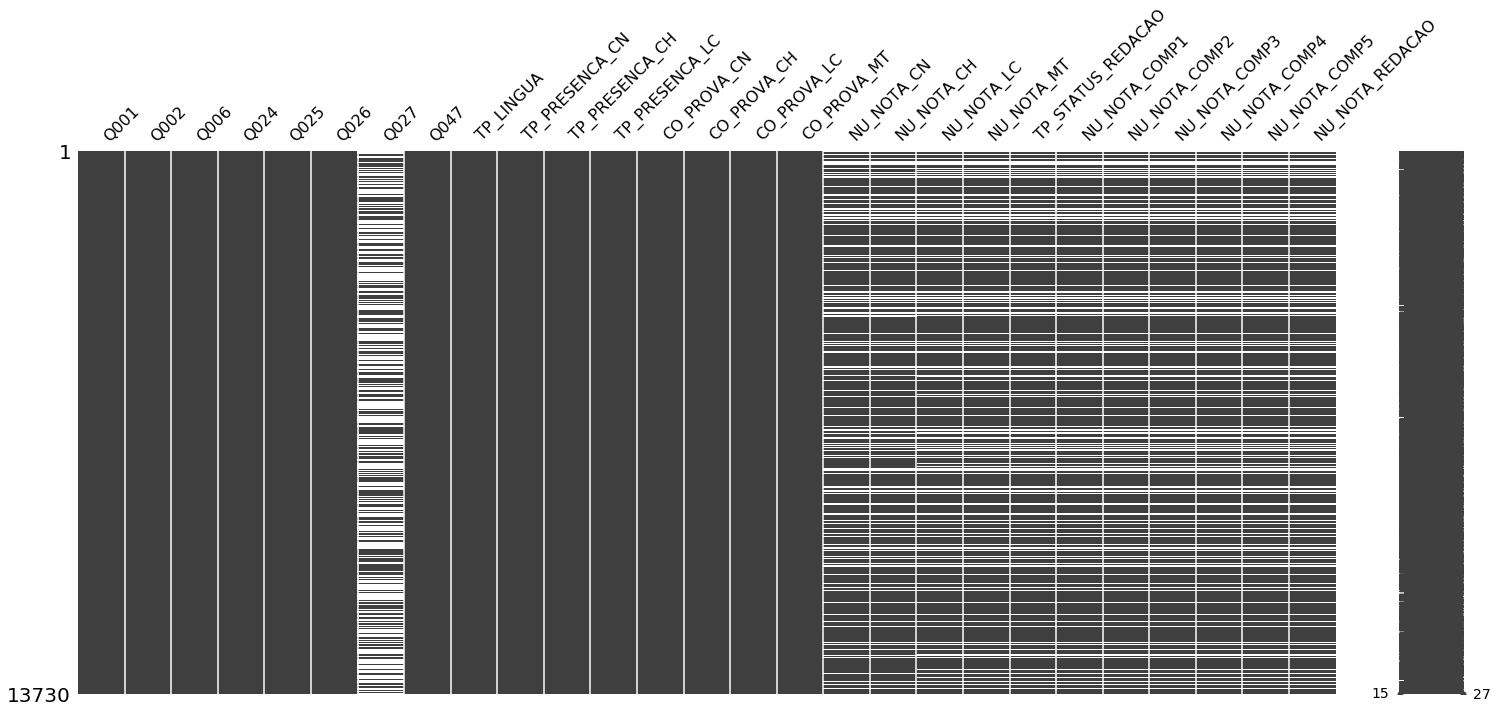

In [5]:
mt = msno.matrix(df_x)

In [6]:
df_x.isna().sum()

Q001                    0
Q002                    0
Q006                    0
Q024                    0
Q025                    0
Q026                    0
Q027                 7373
Q047                    0
TP_LINGUA               0
TP_PRESENCA_CN          0
TP_PRESENCA_CH          0
TP_PRESENCA_LC          0
CO_PROVA_CN             0
CO_PROVA_CH             0
CO_PROVA_LC             0
CO_PROVA_MT             0
NU_NOTA_CN           3389
NU_NOTA_CH           3389
NU_NOTA_LC           3597
NU_NOTA_MT           3597
TP_STATUS_REDACAO    3597
NU_NOTA_COMP1        3597
NU_NOTA_COMP2        3597
NU_NOTA_COMP3        3597
NU_NOTA_COMP4        3597
NU_NOTA_COMP5        3597
NU_NOTA_REDACAO      3597
dtype: int64

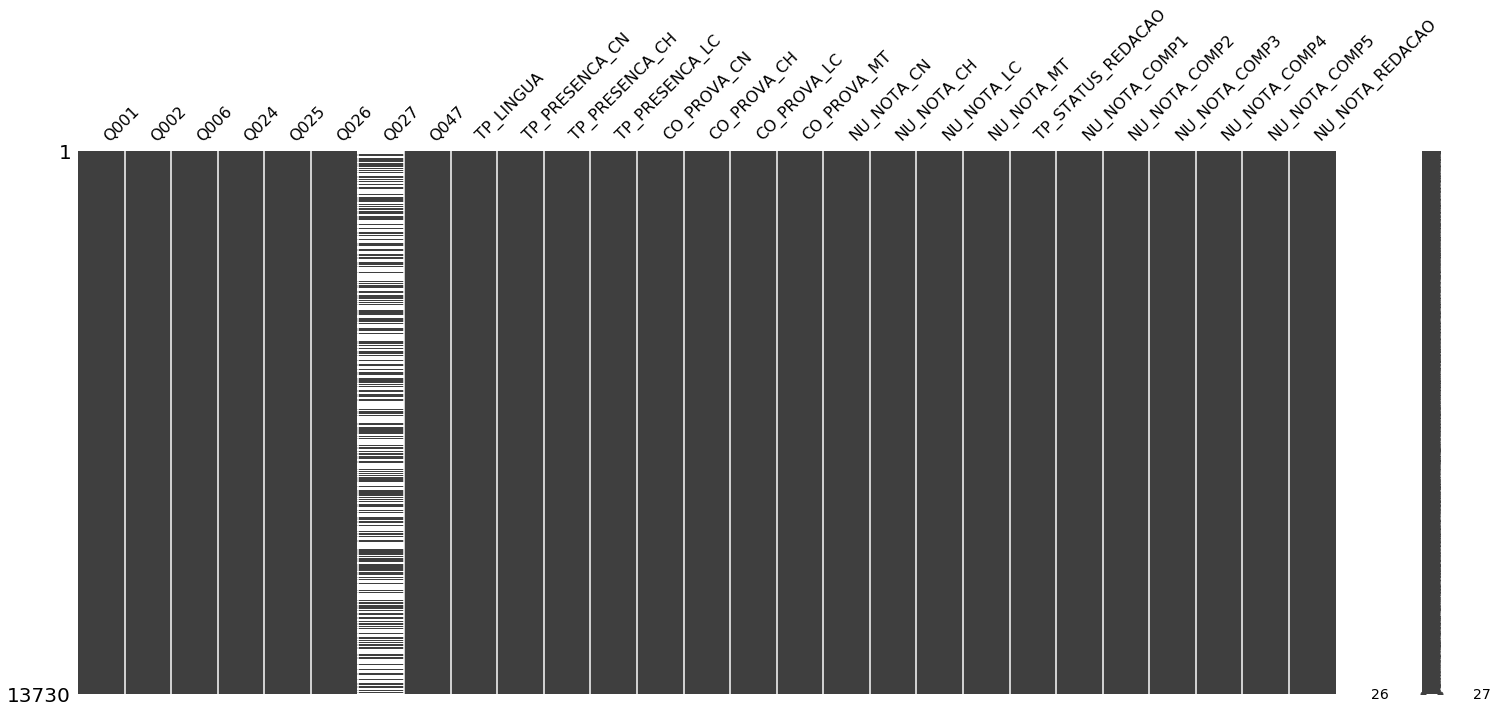

In [7]:
df_x = df_x.replace(np.nan, df_x.mean())

mtx = msno.matrix(df_x)

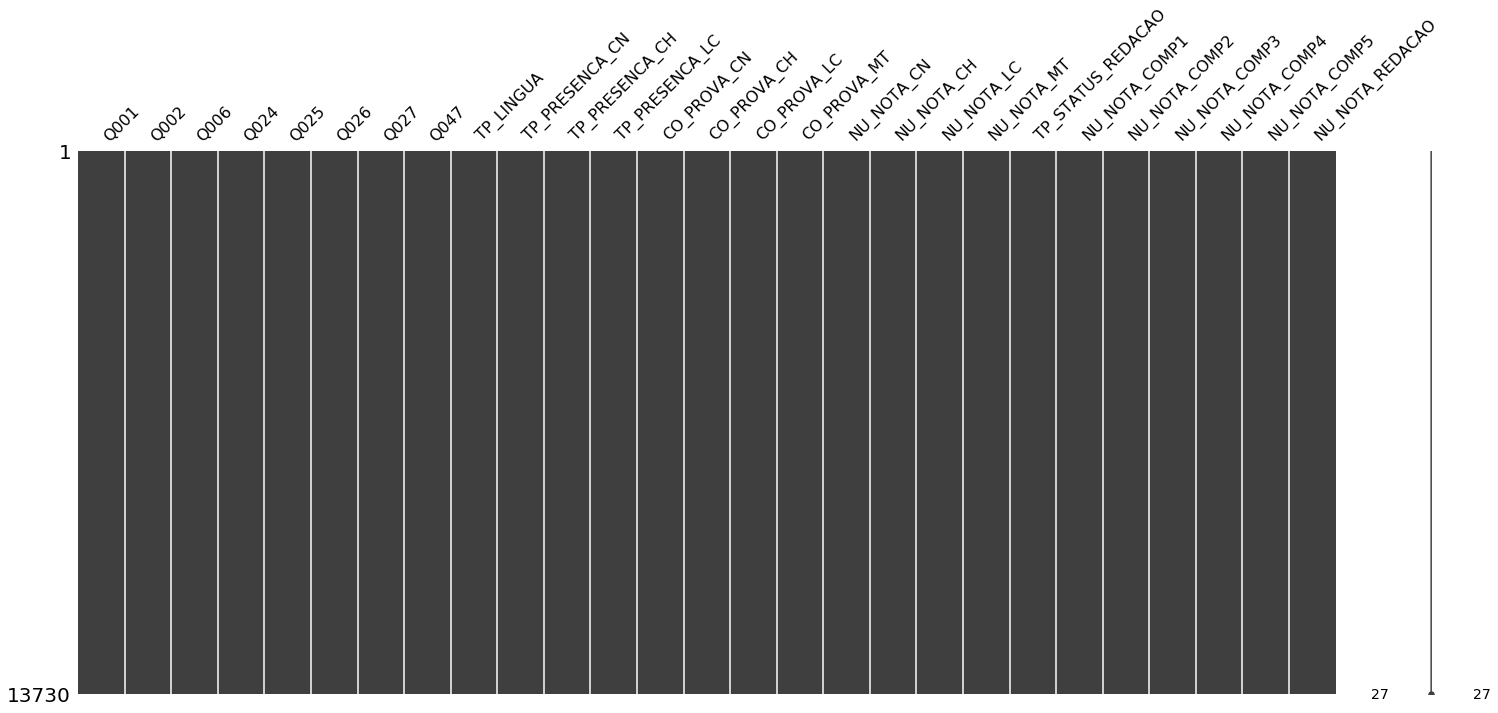

In [8]:
df_x = df_x.replace(np.nan, 0)

mtx = msno.matrix(df_x)

In [9]:
corr = df_x.corr()
corr

,TP_LINGUA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
TP_LINGUA,1.000000,-4.111782e-02,-4.111782e-02,-4.903087e-02,-1.899020e-01,-1.911748e-01,-2.046229e-01,-1.742003e-01,2.267230e-02,-1.163023e-01,-1.148986e-01,-1.203635e-01,-1.234431e-01,-1.142420e-01,-1.330827e-01
TP_PRESENCA_CN,-0.041118,1.000000e+00,1.000000e+00,9.433612e-01,-1.583294e-14,9.630326e-15,8.757512e-04,4.206965e-04,-3.227508e-04,2.727688e-03,2.639494e-03,2.807060e-03,3.327174e-03,3.128724e-03,3.324793e-03
TP_PRESENCA_CH,-0.041118,1.000000e+00,1.000000e+00,9.433612e-01,-1.583294e-14,9.630326e-15,8.757512e-04,4.206965e-04,-3.227508e-04,2.727688e-03,2.639494e-03,2.807060e-03,3.327174e-03,3.128724e-03,3.324793e-03
TP_PRESENCA_LC,-0.049031,9.433612e-01,9.433612e-01,1.000000e+00,1.241729e-02,1.883526e-02,1.939153e-15,7.958640e-15,-1.862423e-17,1.356021e-16,-1.000539e-17,3.889946e-17,4.539107e-17,1.276337e-16,-5.211117e-17
NU_NOTA_CN,-0.189902,-1.583294e-14,-1.583294e-14,1.241729e-02,1.000000e+00,6.095430e-01,5.363598e-01,5.762064e-01,-7.979956e-02,3.519370e-01,4.065691e-01,4.230609e-01,4.014288e-01,4.106212e-01,4.528553e-01
NU_NOTA_CH,-0.191175,9.630326e-15,9.630326e-15,1.883526e-02,6.095430e-01,1.000000e+00,6.792973e-01,5.202550e-01,-1.124888e-01,4.354961e-01,4.792568e-01,5.014821e-01,4.799030e-01,4.866528e-01,5.406164e-01
NU_NOTA_LC,-0.204623,8.757512e-04,8.757512e-04,1.939153e-15,5.363598e-01,6.792973e-01,1.000000e+00,4.946948e-01,-1.176877e-01,4.306034e-01,4.532624e-01,4.753904e-01,4.673558e-01,4.416957e-01,5.129078e-01
NU_NOTA_MT,-0.174200,4.206965e-04,4.206965e-04,7.958640e-15,5.762064e-01,5.202550e-01,4.946948e-01,1.000000e+00,-5.937608e-02,2.994021e-01,3.356383e-01,3.503072e-01,3.422824e-01,3.433370e-01,3.793763e-01
TP_STATUS_REDACAO,0.022672,-3.227508e-04,-3.227508e-04,-1.862423e-17,-7.979956e-02,-1.124888e-01,-1.176877e-01,-5.937608e-02,1.000000e+00,-5.834669e-01,-4.821489e-01,-4.521222e-01,-4.911024e-01,-2.611221e-01,-4.983650e-01
NU_NOTA_COMP1,-0.116302,2.727688e-03,2.727688e-03,1.356021e-16,3.519370e-01,4.354961e-01,4.306034e-01,2.994021e-01,-5.834669e-01,1.000000e+00,7.566641e-01,7.594519e-01,8.245379e-01,5.585867e-01,8.627443e-01


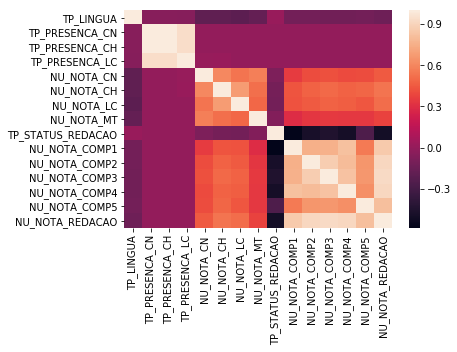

In [11]:
corr = df_x.corr()
hm = sns.heatmap(corr, annot=False)
hm

In [12]:
df_train['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

In [13]:
df_x['Q001'], uniques = pd.factorize(df_x.Q001, sort=True)
df_x['Q002'], uniques = pd.factorize(df_x.Q002, sort=True)
df_x['Q006'], uniques = pd.factorize(df_x.Q006, sort=True)
df_x['Q024'], uniques = pd.factorize(df_x.Q024, sort=True)
df_x['Q025'], uniques = pd.factorize(df_x.Q025, sort=True)
df_x['Q026'], uniques = pd.factorize(df_x.Q026, sort=True)
df_x['Q027'], uniques = pd.factorize(df_x.Q027, sort=True)
df_x['Q047'], uniques = pd.factorize(df_x.Q047, sort=True)

df_x['CO_PROVA_CH'], uniques = pd.factorize(df_x.CO_PROVA_CN, sort=True)
df_x['CO_PROVA_CN'], uniques = pd.factorize(df_x.CO_PROVA_CN, sort=True)
df_x['CO_PROVA_LC'], uniques = pd.factorize(df_x.CO_PROVA_LC, sort=True)
df_x['CO_PROVA_MT'], uniques = pd.factorize(df_x.CO_PROVA_MT, sort=True)

df_x.head(10)

,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,TP_LINGUA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,3,3,2,0,0,2,8,0,1,1,1,1,1,1,1,8,436.300000,495.400000,581.200000,399.400000,1.000000,120.000000,120.000000,120.000000,80.000000,80.000000,520.000000
1,0,0,1,0,0,0,0,0,1,1,1,1,7,7,1,8,474.500000,544.100000,599.000000,459.800000,1.000000,140.000000,120.000000,120.000000,120.000000,80.000000,580.000000
2,3,3,2,0,0,0,0,0,1,0,0,0,3,3,2,2,473.495155,529.661087,516.472841,482.497928,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258
3,7,4,4,2,1,2,6,3,0,0,0,0,3,3,2,2,473.495155,529.661087,516.472841,482.497928,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258
4,4,3,2,0,0,1,6,0,1,0,0,0,3,3,2,2,473.495155,529.661087,516.472841,482.497928,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258
5,4,4,2,1,1,0,0,0,0,1,1,1,8,8,0,7,439.700000,583.200000,410.900000,364.500000,1.000000,120.000000,120.000000,120.000000,160.000000,100.000000,620.000000
6,4,3,2,1,1,2,5,0,0,1,1,1,4,4,5,6,420.100000,604.200000,484.500000,529.200000,1.000000,100.000000,120.000000,120.000000,120.000000,100.000000,560.000000
7,6,5,11,1,1,0,0,3,0,1,1,1,7,7,6,3,619.600000,625.800000,611.200000,566.700000,1.000000,140.000000,120.000000,120.000000,120.000000,120.000000,620.000000
8,7,4,1,0,1,0,0,0,1,1,1,1,7,7,5,6,500.500000,555.200000,521.800000,372.400000,1.000000,140.000000,160.000000,140.000000,140.000000,100.000000,680.000000
9,7,4,6,1,1,1,8,0,0,0,0,0,3,3,2,2,473.495155,529.661087,516.472841,482.497928,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258


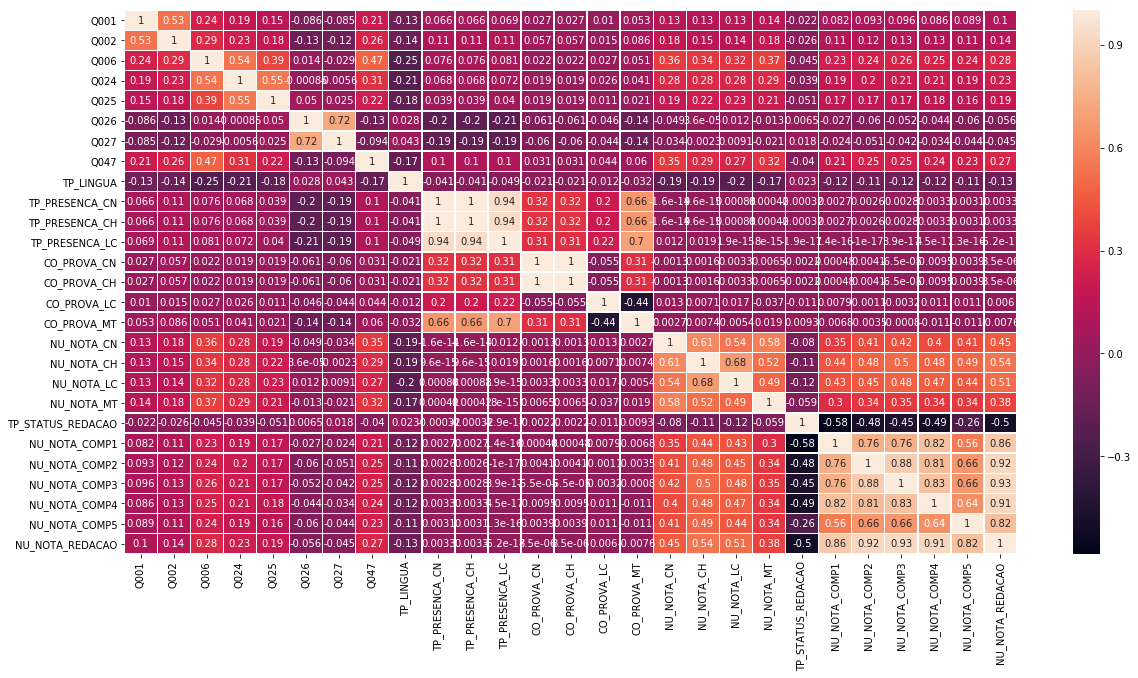

In [25]:
fig, ax = plt.subplots(figsize=(20,10)) 

corr = df_x.corr()
hm = sns.heatmap(corr, xticklabels=True, yticklabels=True, annot=True, linewidths=.5, ax=ax)
hm

In [29]:
features = ['Q006', 'Q024', 'Q047', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
           'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
           'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']

## Modelo

In [32]:
X = df_x[features]
y = df_x['NU_NOTA_MT']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)

print(model.score(X, y))
print(model.intercept_)

0.41530675888463775
23.49792756340628


## Teste

In [34]:
df_test = pd.read_csv('test.csv')

df_test.head(10)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A
5,e656d6bad65c93fb2880f1eba5037008c8e75774,43,RS,18,M,3,1,1,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,414.5,568.5,542.5,1,1.0,120.0,120.0,120.0,120.0,80.0,560.0,E,E,C,B,B,A,NaN,A
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,35,SP,17,F,1,1,2,0,3,1.0,0,4.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,485.7,654.6,606.6,0,1.0,140.0,120.0,120.0,120.0,120.0,620.0,D,E,H,D,B,A,NaN,D
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,23,CE,17,F,3,2,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,423.2,521.0,451.8,0,1.0,100.0,80.0,80.0,100.0,60.0,420.0,D,C,B,A,A,A,NaN,A
8,043c544a2104aa8a9849f1a703a08d37a2f16839,51,MT,18,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,414.4,577.6,548.6,1,1.0,120.0,160.0,160.0,140.0,160.0,740.0,B,D,C,A,A,B,D,A
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,15,PA,17,M,3,2,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,456.8,518.5,488.7,0,1.0,120.0,120.0,120.0,120.0,100.0,580.0,B,C,B,A,A,A,NaN,A


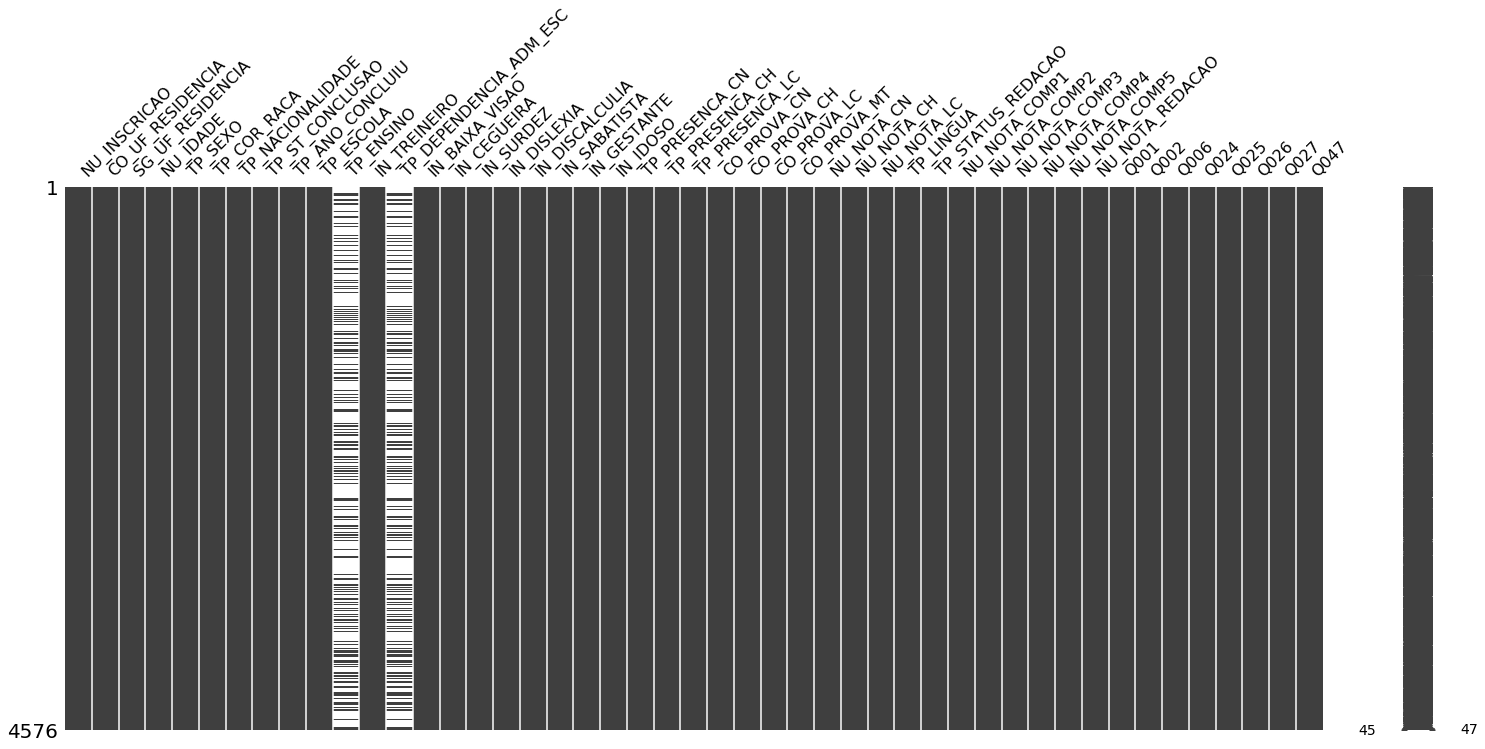

In [35]:
df_test = df_test.replace(np.nan, df_x.mean())

mtx = msno.matrix(df_test)

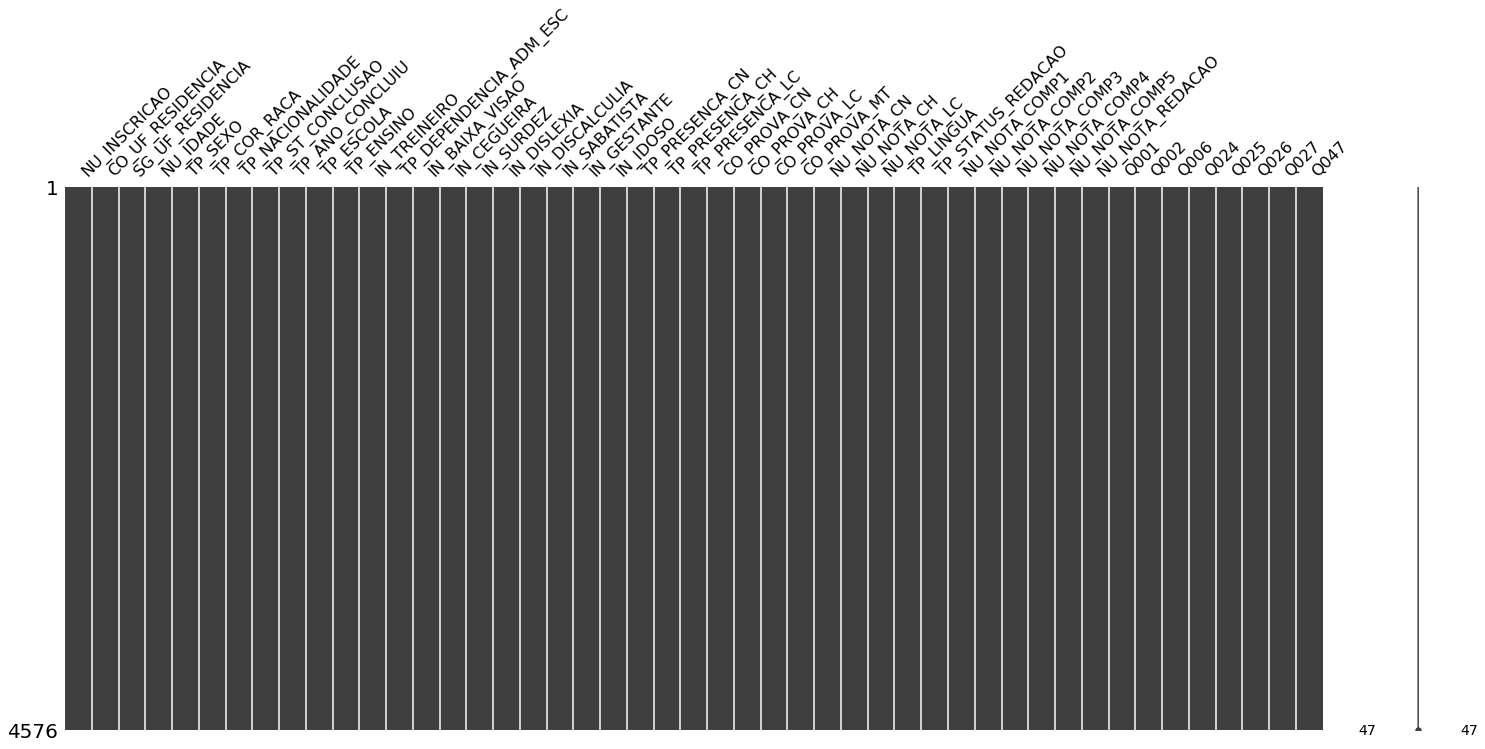

In [36]:
df_test = df_test.replace(np.nan, 0)

mtx = msno.matrix(df_test)

In [37]:
df_test['Q001'], uniques = pd.factorize(df_test.Q001, sort=True)
df_test['Q002'], uniques = pd.factorize(df_test.Q002, sort=True)
df_test['Q006'], uniques = pd.factorize(df_test.Q006, sort=True)
df_test['Q024'], uniques = pd.factorize(df_test.Q024, sort=True)
df_test['Q025'], uniques = pd.factorize(df_test.Q025, sort=True)
df_test['Q026'], uniques = pd.factorize(df_test.Q026, sort=True)
df_test['Q027'], uniques = pd.factorize(df_test.Q027, sort=True)
df_test['Q047'], uniques = pd.factorize(df_test.Q047, sort=True)
df_test['CO_PROVA_CH'], uniques = pd.factorize(df_test.CO_PROVA_CH, sort=True)
df_test['CO_PROVA_CN'], uniques = pd.factorize(df_test.CO_PROVA_CN, sort=True)
df_test['CO_PROVA_LC'], uniques = pd.factorize(df_test.CO_PROVA_LC, sort=True)
df_test['CO_PROVA_MT'], uniques = pd.factorize(df_test.CO_PROVA_MT, sort=True)

answer = df_test['NU_INSCRICAO']  
df_test['NU_INSCRICAO'], uniques = pd.factorize(df_test.NU_INSCRICAO, sort=True)

print(answer.head(5))

df_test.head(5)

0    73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1    71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2    b38a03232f43b11c9d0788abaf060f7366053b6d
3    70b682d9a3636be23f6120fa9d6b164eb3c6002d
4    715494628a50142ce8cb17191cfe6d0f3cae0934
Name: NU_INSCRICAO, dtype: object


,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,2016,41,PR,22,F,3,1,1,5,1,0.0,0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,5,0,7,464.800000,443.500000,431.800000,0,1.000000,120.000000,80.000000,80.000000,100.000000,40.000000,420.000000,1,0,2,0,0,2,3,0
1,1977,21,MA,26,F,3,1,1,8,1,0.0,0,0.0,0,0,0,0,0,0,0,0,1,1,1,7,7,6,3,391.100000,491.100000,548.000000,1,1.000000,120.000000,120.000000,120.000000,120.000000,100.000000,580.000000,4,1,2,1,1,1,6,0
2,3172,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,5,1,8,595.900000,622.700000,613.600000,0,1.000000,80.000000,40.000000,40.000000,80.000000,80.000000,320.000000,4,4,3,1,1,0,0,0
3,1970,15,PA,27,F,3,1,1,8,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,2,473.495155,529.661087,516.472841,0,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,7,4,6,1,1,0,0,0
4,1972,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,4,4,5,6,592.900000,492.600000,571.400000,1,1.000000,100.000000,80.000000,60.000000,80.000000,0.000000,320.000000,3,7,7,2,1,0,0,0


In [ ]:
# mean_absolute_error(y_true, y_pred)

In [ ]:
# scatter_plot

## Predição

In [40]:
pred = model.predict(df_test[features])

## Exportação

In [41]:
df_csv = pd.DataFrame(answer)
pred_csv = pd.DataFrame(pred)

#df_csv['NU_NOTA_MT'] = round(pred_csv, 2)
df_csv['NU_NOTA_MT'] = pred_csv
                             
df_csv.head(10)

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,433.747928
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,441.247928
2,b38a03232f43b11c9d0788abaf060f7366053b6d,572.997928
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,531.747928
4,715494628a50142ce8cb17191cfe6d0f3cae0934,552.122928
5,e656d6bad65c93fb2880f1eba5037008c8e75774,464.497928
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,566.247928
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,430.872928
8,043c544a2104aa8a9849f1a703a08d37a2f16839,468.247928
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,456.997928


In [42]:
df_csv.to_csv('answer.csv', index = False, header=True)